RMSE: 52.74767842523168


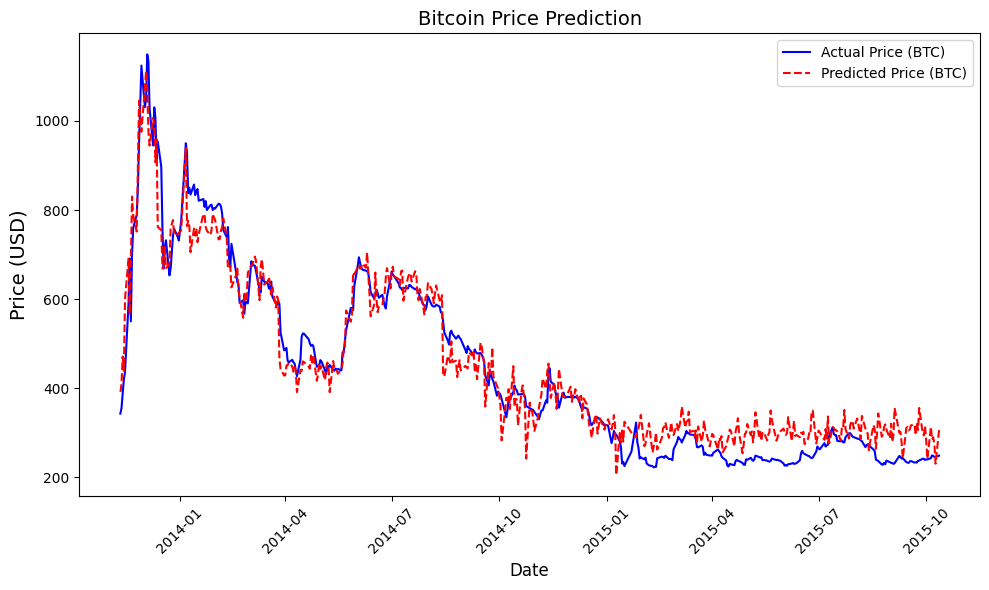

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

btc_df = pd.read_csv('./data/BTC_USD.csv')
snp_df = pd.read_csv('./data/snp500.csv')

snp_df['Date'] = snp_df['Date'].str.split(' ').str[0]  
snp_df['Date'] = pd.to_datetime(snp_df['Date'], format='%Y-%m-%d') 

btc_df['Date'] = pd.to_datetime(btc_df['Date'], format='%m/%d/%Y') 
btc_df['High_BTC'] = btc_df['High'].replace({',': ''}, regex=True).astype(float) 
btc_df['Low_BTC'] = btc_df['Low'].replace({',': ''}, regex=True).astype(float)  

snp_df['Price'] = (snp_df['High'] + snp_df['Low']) / 2

btc_df['Year'] = pd.to_datetime(btc_df['Date']).dt.year
btc_df['Month'] = pd.to_datetime(btc_df['Date']).dt.month
btc_df['Day'] = pd.to_datetime(btc_df['Date']).dt.day
btc_df['Weekday'] = pd.to_datetime(btc_df['Date']).dt.weekday

snp_df['Year'] = snp_df['Date'].dt.year
snp_df['Month'] = snp_df['Date'].dt.month
snp_df['Day'] = snp_df['Date'].dt.day
snp_df['Weekday'] = snp_df['Date'].dt.weekday

merged_df = pd.merge(btc_df, snp_df[['Date', 'Price']], on='Date', suffixes=('_BTC', '_SNP'))

merged_df['Prev_Price_BTC'] = merged_df['High_BTC'].shift(1)
merged_df['Prev_Price_SNP'] = merged_df['Price_SNP'].shift(1)

merged_df = merged_df.dropna()

X = merged_df[['Year', 'Month', 'Day', 'Weekday', 'Prev_Price_BTC', 'Prev_Price_SNP']]
y = merged_df['High_BTC']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'].iloc[-len(y_test):], y_test, label='Actual Price (BTC)', color='blue')
plt.plot(merged_df['Date'].iloc[-len(y_test):], y_pred, label='Predicted Price (BTC)', color='red', linestyle='--')
plt.title('Bitcoin Price Prediction', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
print("BTC Data Date Range:")
print(f"Start Date: {btc_df['Date'].min()}")
print(f"End Date: {btc_df['Date'].max()}")

print("S&P 500 Data Date Range:")
print(f"Start Date: {snp_df['Date'].min()}")
print(f"End Date: {snp_df['Date'].max()}")


BTC Data Date Range:
Start Date: 2012-04-06 00:00:00
End Date: 2025-01-16 00:00:00
S&P 500 Data Date Range:
Start Date: 1927-12-30 00:00:00
End Date: 2023-06-02 00:00:00
